1.Data wrangling
1.1
Ensure that the data is clean and free from any missing or incorrect entries.
    i. Inspect the data manually to identify missing or incorrect information using the functions isna() and notna().
1.2
Based on your knowledge of data analytics, include your recommendations for treating missing and incorrect data (dropping the null values or filling them).
1.3
Choose a suitable data wrangling technique—either data standardization or normalization. Execute the preferred normalization method and present the resulting data. (Normalization is the preferred approach for this problem.)
1.4
Share your insights regarding the application of the GroupBy() function for either data chunking or merging, and offer a recommendation based on your analysis.


In [110]:
#1. Data Wrangling 
#1.1  #Ensure that the data is clean and free from any missing or incorrect entries.
# Inspect the data manually to identify missing or incorrect information using the functions isna() and notna().

import pandas as pd
df = pd.read_csv("AusApparalSales4thQrt2020.csv")
df


,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000
7556,30-Dec-2020,Evening,TAS,Kids,15,37500
7557,30-Dec-2020,Evening,TAS,Men,15,37500
7558,30-Dec-2020,Evening,TAS,Women,11,27500


In [ ]:
#Inspecting the data
print("shape:", df.shape)
print(df.head())
print("\ndtypes:\n", df.dtypes)
print("\nmissing per column:\n", df.isna().sum())
print("\nany duplicates:", df.duplicated().sum())


shape: (7560, 6)
         Date        Time State     Group  Unit  Sales
0  1-Oct-2020     Morning    WA      Kids     8  20000
1  1-Oct-2020     Morning    WA       Men     8  20000
2  1-Oct-2020     Morning    WA     Women     4  10000
3  1-Oct-2020     Morning    WA   Seniors    15  37500
4  1-Oct-2020   Afternoon    WA      Kids     3   7500

dtypes:
 Date     object
Time     object
State    object
Group    object
Unit      int64
Sales     int64
dtype: object

missing per column:
 Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

any duplicates: 0


In [113]:
#1.1 Ensure that the data is clean and free from any missing or incorrect entries.
#Inspect the data manually to identify missing or incorrect information using the functions isna() and notna().
df.isna().sum()
df.notna().sum()
df[df.isna().any(axis=1)]
df[df["Unit"].isna() | df["Sales"].isna()]
df_cleaned = df.dropna()
df_cleaned
df["Unit"].fillna(0, inplace=True)
df
df["Sales"].fillna(0, inplace=True)
df
df.isna().sum()
df
df.loc[:5, ["Time", "Unit"]]

/var/folders/v5/dkvlqpvx59l89jmlvly82vrc0000gn/T/ipykernel_13062/2022622201.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Unit"].fillna(0, inplace=True)
/var/folders/v5/dkvlqpvx59l89jmlvly82vrc0000gn/T/ipykernel_13062/2022622201.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

,Time,Unit
0,Morning,8
1,Morning,8
2,Morning,4
3,Morning,15
4,Afternoon,3
5,Afternoon,10


Based on my knowledge to data analytics, my recommendations for treating missing and incorrect data (dropping the null values or fillin them is as follows:

First checking the missing values
If missing values is small and random, we drop the rows : df = df.dropna()
If missing values is moderate but meaningful , we fill it with mean, median or mode : df["column_name"].fillna(df["column_name"].median(), inplace=True). : df["column_name"].fillna(df["column_name"].mean(), inplace=True) or  : df["column_name"].fillna(df["column_name"].mode()[0], inplace=True)
If missing values is large in one column, we drop the column unless it is critical: df.drop(columns=["unnecessary_column"])
If it is for time-series, we use forward/ backward  fill or interpolation: : df["value"].fillna(method="ffill", inplace=True)
If the datas are incorrect, we replace obvious errore, or set to NaN and handle with the above mentioned methods: 
Fix obvious typos with .replace() : eg: Age being 300 

In [ ]:
#1.3 Choose a suitable data wrangling technique—either data standardization or normalization.
#  Execute the preferred normalization method and present the resulting data. (Normalization is the preferred approach for this problem.
df_normalized = (df[["Unit","Sales"]] - df[["Unit","Sales"]] .min()) / (df[["Unit","Sales"]].max() - df[["Unit","Sales"]].min())
df_normalized

,Unit,Sales
0,0.095238,0.095238
1,0.095238,0.095238
2,0.031746,0.031746
3,0.206349,0.206349
4,0.015873,0.015873
...,...,...
7555,0.190476,0.190476
7556,0.206349,0.206349
7557,0.206349,0.206349
7558,0.142857,0.142857


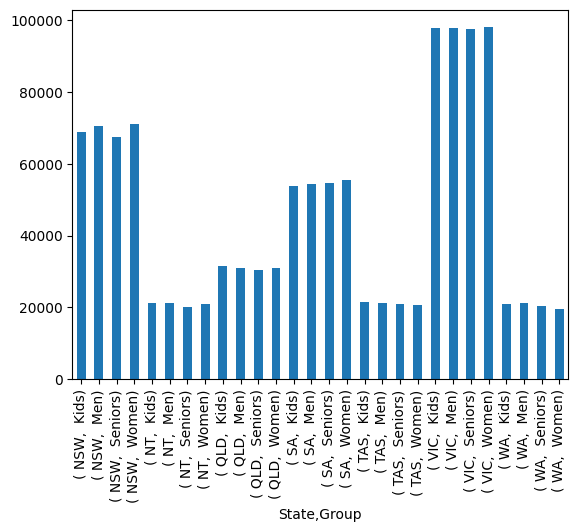

In [ ]:
#1.4 Share your insights regarding the application of the GroupBy() function for either data chunking or merging, and offer a recommendation based on your analysis.

avg_sales = df.groupby(["State","Group"])["Sales"].mean().plot(kind="bar")



2. Data analysis

    2.1
    Perform descriptive statistical analysis on the data in the Sales and Unit columns. Utilize techniques such as mean, median, mode, and standard deviation for this analysis.
    2.2
     Identify the group with the highest sales and the group with the lowest sales based on the data provided.
    2.3
    Identify the group with the highest and lowest sales based on the data provided.
    2.4
    Generate weekly, monthly, and quarterly reports to document and present the results of the analysis conducted.
    (Use suitable libraries such as NumPy, Pandas, and SciPy for performing the analysis.)

In [108]:
#2. Data Analysis 
# #Perform descriptive statistical analysis on the data in the Sales and Unit columns. Utilize techniques such as mean, median, mode, and standard deviation for this analysis.
import numpy as np
from statistics import mode 
df
print("\n   Sales Column  ")
print("Mean:", df["Sales"].mean())
print("Mode:", df["Sales"].median())
print("Mode:", df["Sales"].mode()[0])
print("Standard Deviation:", df["Sales"].std())

print("\n   Unit Column  ")
print("Mean:", df["Unit"].mean())
print("Median:", df["Unit"].median())
print("Mode:", df["Unit"].mode()[0])
print("Standard Deviation:", df["Unit"].std())

#Identify the group with the highest sales and the group with the lowest sales based on the data provided.
grouped = df.groupby(["Group"])["Sales"].sum().reset_index()
grouped
#Getting highest and lowest sales
highest_sales = grouped.nlargest(1, "Sales")
print("Highest_sales")
print(highest_sales)
lowest_sales = grouped.nsmallest(1, "Sales")
print("Lowest_sales")
print(lowest_sales)
# 2.3 Identify the group with the highest and lowest sales based on the data provided.

index_highest_sales_overall = df["Sales"].idxmax()
highest_sales_overall = df.loc[index_highest_sales_overall]
print("\n   Highest_Sales_Overall   ")
print(highest_sales_overall)

index_lowest_sales_overall = df["Sales"].idxmin()
lowest_sales_overall = df.loc[index_lowest_sales_overall]
print("\n   Lowest_Sales_Overall   ")
print(lowest_sales_overall)






   Sales Column  
Mean: 45008.271572260455
Mode: 35000.0
Mode: 22500.0
Standard Deviation: 32246.041283054

   Unit Column  
Mean: 18.00370517401085
Median: 14.0
Mode: 9.0
Standard Deviation: 12.903548907635553
Highest_sales
  Group       Sales
1   Men  85725000.0
Lowest_sales
      Group       Sales
2   Seniors  84037500.0

   Highest_Sales_Overall   
Date     5-Dec-20
Time      Evening
State         VIC
Group     Seniors
Unit         65.0
Sales    162500.0
Name: 5423, dtype: object

   Lowest_Sales_Overall   
Date     1-Nov-20
Time      Morning
State          NT
Group         Men
Unit          2.0
Sales      5000.0
Name: 2533, dtype: object


In [124]:
#2.4
    #Generate weekly, monthly, and quarterly reports to document and present the results of the analysis conducted.
    #(Use suitable libraries such as NumPy, Pandas, and SciPy for performing the analysis.)
df
df["Date"] = pd.to_datetime(df["Date"])
df.info()
weekly_report = df.resample('W', on="Date")["Sales"].sum().reset_index()
weekly_report.rename(columns={"Sales": "Weekly Sales"}, inplace=True)
print("\n  Weekly Report  ")
print(weekly_report)

monthly_report = df.resample('M', on="Date")["Sales"].sum().reset_index()
monthly_report.rename(columns={"Sales": "Monthly Sales"}, inplace=True)
print("\n  Monthly Report  ")
print(monthly_report)

quarterly_report = df.resample('Q', on="Date")["Sales"].sum().reset_index()
quarterly_report.rename(columns={"Sales": "Quarterly Sales"}, inplace=True)
print("\n  Quarterly Report  ")
print(quarterly_report)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB

  Weekly Report  
         Date  Weekly Sales
0  2020-10-04      15045000
1  2020-10-11      27002500
2  2020-10-18      26640000
3  2020-10-25      26815000
4  2020-11-01      21807500
5  2020-11-08      20865000
6  2020-11-15      21172500
7  2020-11-22      21112500
8  2020-11-29      21477500
9  2020-12-06      29622500
10 2020-12-13      31525000
11 2020-12-20      31655000
12 2020-12-27      31770000
13 2021-01-03      13792500

  Monthly Report  
        Date

/var/folders/v5/dkvlqpvx59l89jmlvly82vrc0000gn/T/ipykernel_13062/2471544220.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_report = df.resample('M', on="Date")["Sales"].sum().reset_index()
/var/folders/v5/dkvlqpvx59l89jmlvly82vrc0000gn/T/ipykernel_13062/2471544220.py:17: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_report = df.resample('Q', on="Date")["Sales"].sum().reset_index()


3. Data visualization

3.1 
Use suitable data visualization libraries to construct a dashboard for the head of sales and marketing. The dashboard should encompass key parameters:
    i.State-wise sales analysis for different demographic groups (kids, women, men, and seniors).
    ii.Group-wise sales analysis (Kids, Women, Men, and Seniors) across various states.
    iii.Time-of-the-day analysis: Identify peak and off-peak sales periods to facilitate strategic planning for S&M teams. This information aids in designing programs like hyper-personalization and Next Best Offers to enhance sales.
3.2 
Ensure the visualization is clear and accessible for effective decision-making by the head of sales and marketing (S&M).
The dashboard must contain daily, weekly, monthly, and quarterly charts.
(Any visualization library can be used for this purpose. However, since statistical analysis is being done, Seaborn is preferred.)
3.3 
Include your recommendation and indicate why you are choosing the recommended visualization package.

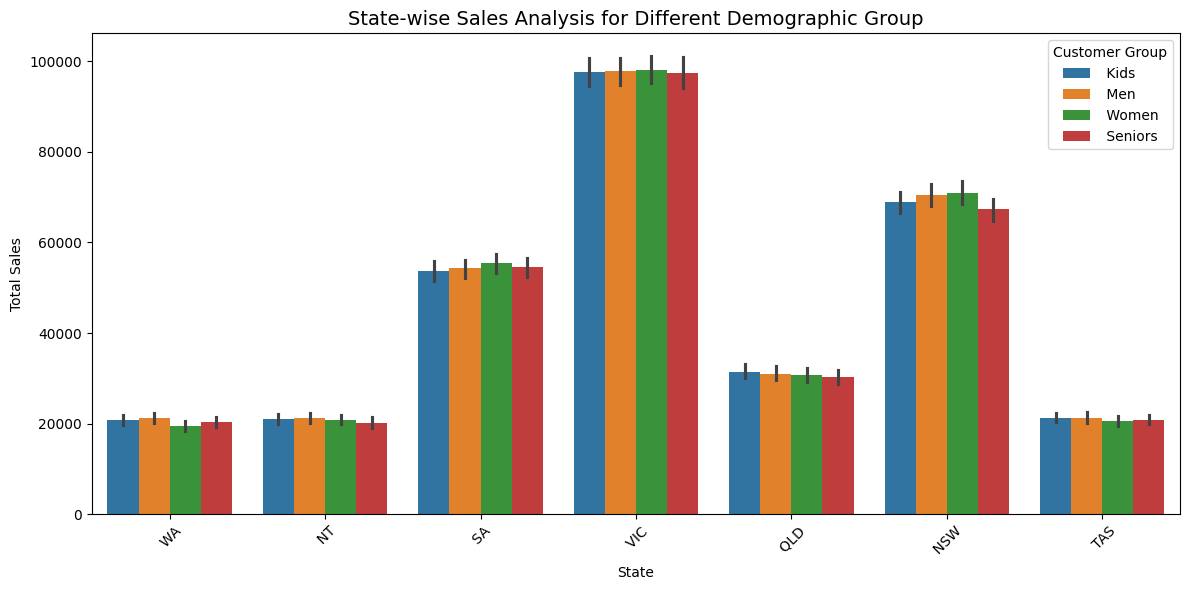

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#3.1 i. State-wise sales analysis for different demographic groups (kids, women, men, and seniors).
plt.figure(figsize=(12,6))
sns.barplot(data=df, x="State", y="Sales", hue="Group")
plt.title("State-wise Sales Analysis for Different Demographic Group", fontsize=14)
plt.xlabel("State")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.legend(title="Customer Group")
plt.tight_layout()
plt.show()



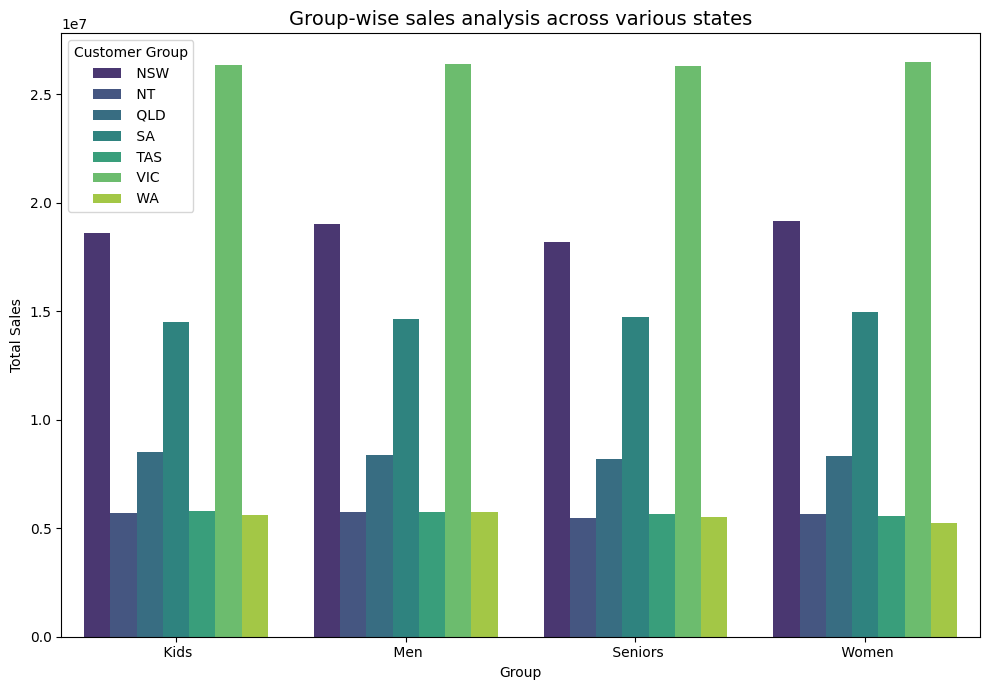

In [ ]:
#3.1 ii.Group-wise sales analysis (Kids, Women, Men, and Seniors) across various states.
grouped_sales_by_states = df.groupby(["Group", "State"])["Sales"].sum().reset_index()
grouped_sales_by_states
plt.figure(figsize=(10,7))
sns.barplot(data=grouped_sales_by_states, x="Group", y="Sales", hue="State", palette="viridis")
plt.title("Group-wise sales analysis across various states", fontsize=14)
plt.xlabel("Group")
plt.ylabel("Total Sales")
plt.legend(title="Customer Group")
plt.tight_layout()
plt.show()


Empty DataFrame
Columns: [Hour, Sales]
Index: []


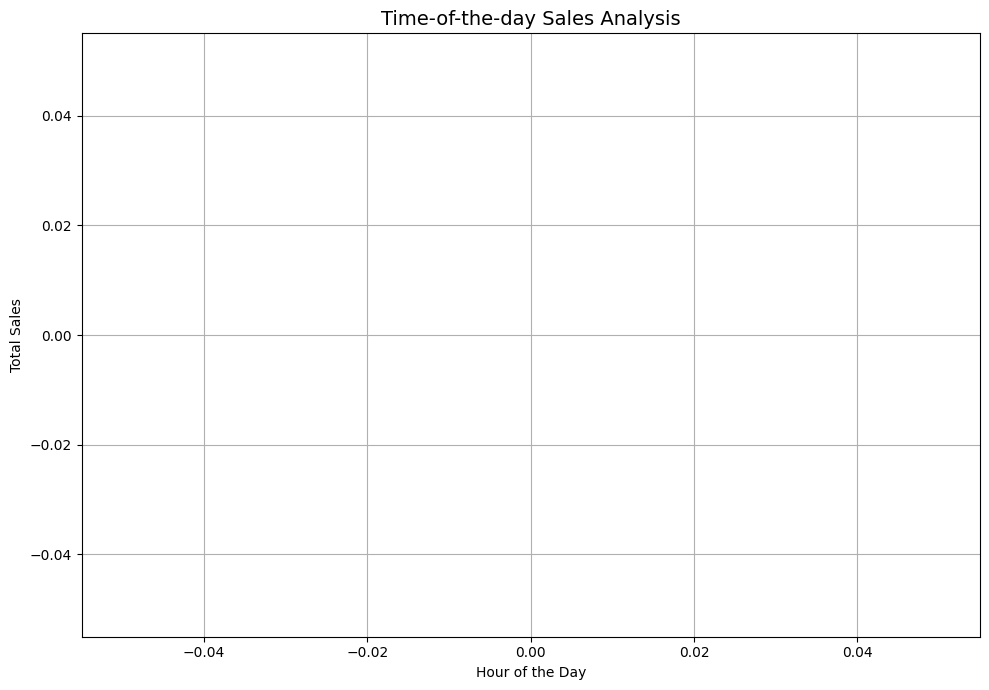

In [154]:
#3.1 iii.Time-of-the-day analysis: Identify peak and off-peak sales periods to facilitate strategic planning for S&M teams. 
# This information aids in designing programs like hyper-personalization and Next Best Offers to enhance sales.

time_map = {"Morning":9, "Afternoon":14, "Evening": 19, "Night": 22}
df["Hour"] = df["Time"].map(time_map)
hourly_sales = df.groupby("Hour") ["Sales"].sum().reset_index()
print(hourly_sales)

#'''df["Time"] = pd.to_datetime(df["Time"], format="%H:%M").dt.hour
# df["Hour"] = pd.to_datetime(df["Date"], format="%H:%M").dt.hour

plt.figure(figsize=(10,7))
sns.lineplot(data=hourly_sales, x="Hour", y="Sales", marker="o", color="teal")
plt.title("Time-of-the-day Sales Analysis", fontsize=14)
plt.xlabel("Hour of the Day")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/v5/dkvlqpvx59l89jmlvly82vrc0000gn/T/ipykernel_13062/2599643836.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_sales, x='Date', y='Sales', ax=axes[2], palette='Blues_d')
/var/folders/v5/dkvlqpvx59l89jmlvly82vrc0000gn/T/ipykernel_13062/2599643836.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=quarterly_sales, x='Date', y='Sales', ax=axes[3], palette='Greens_d')


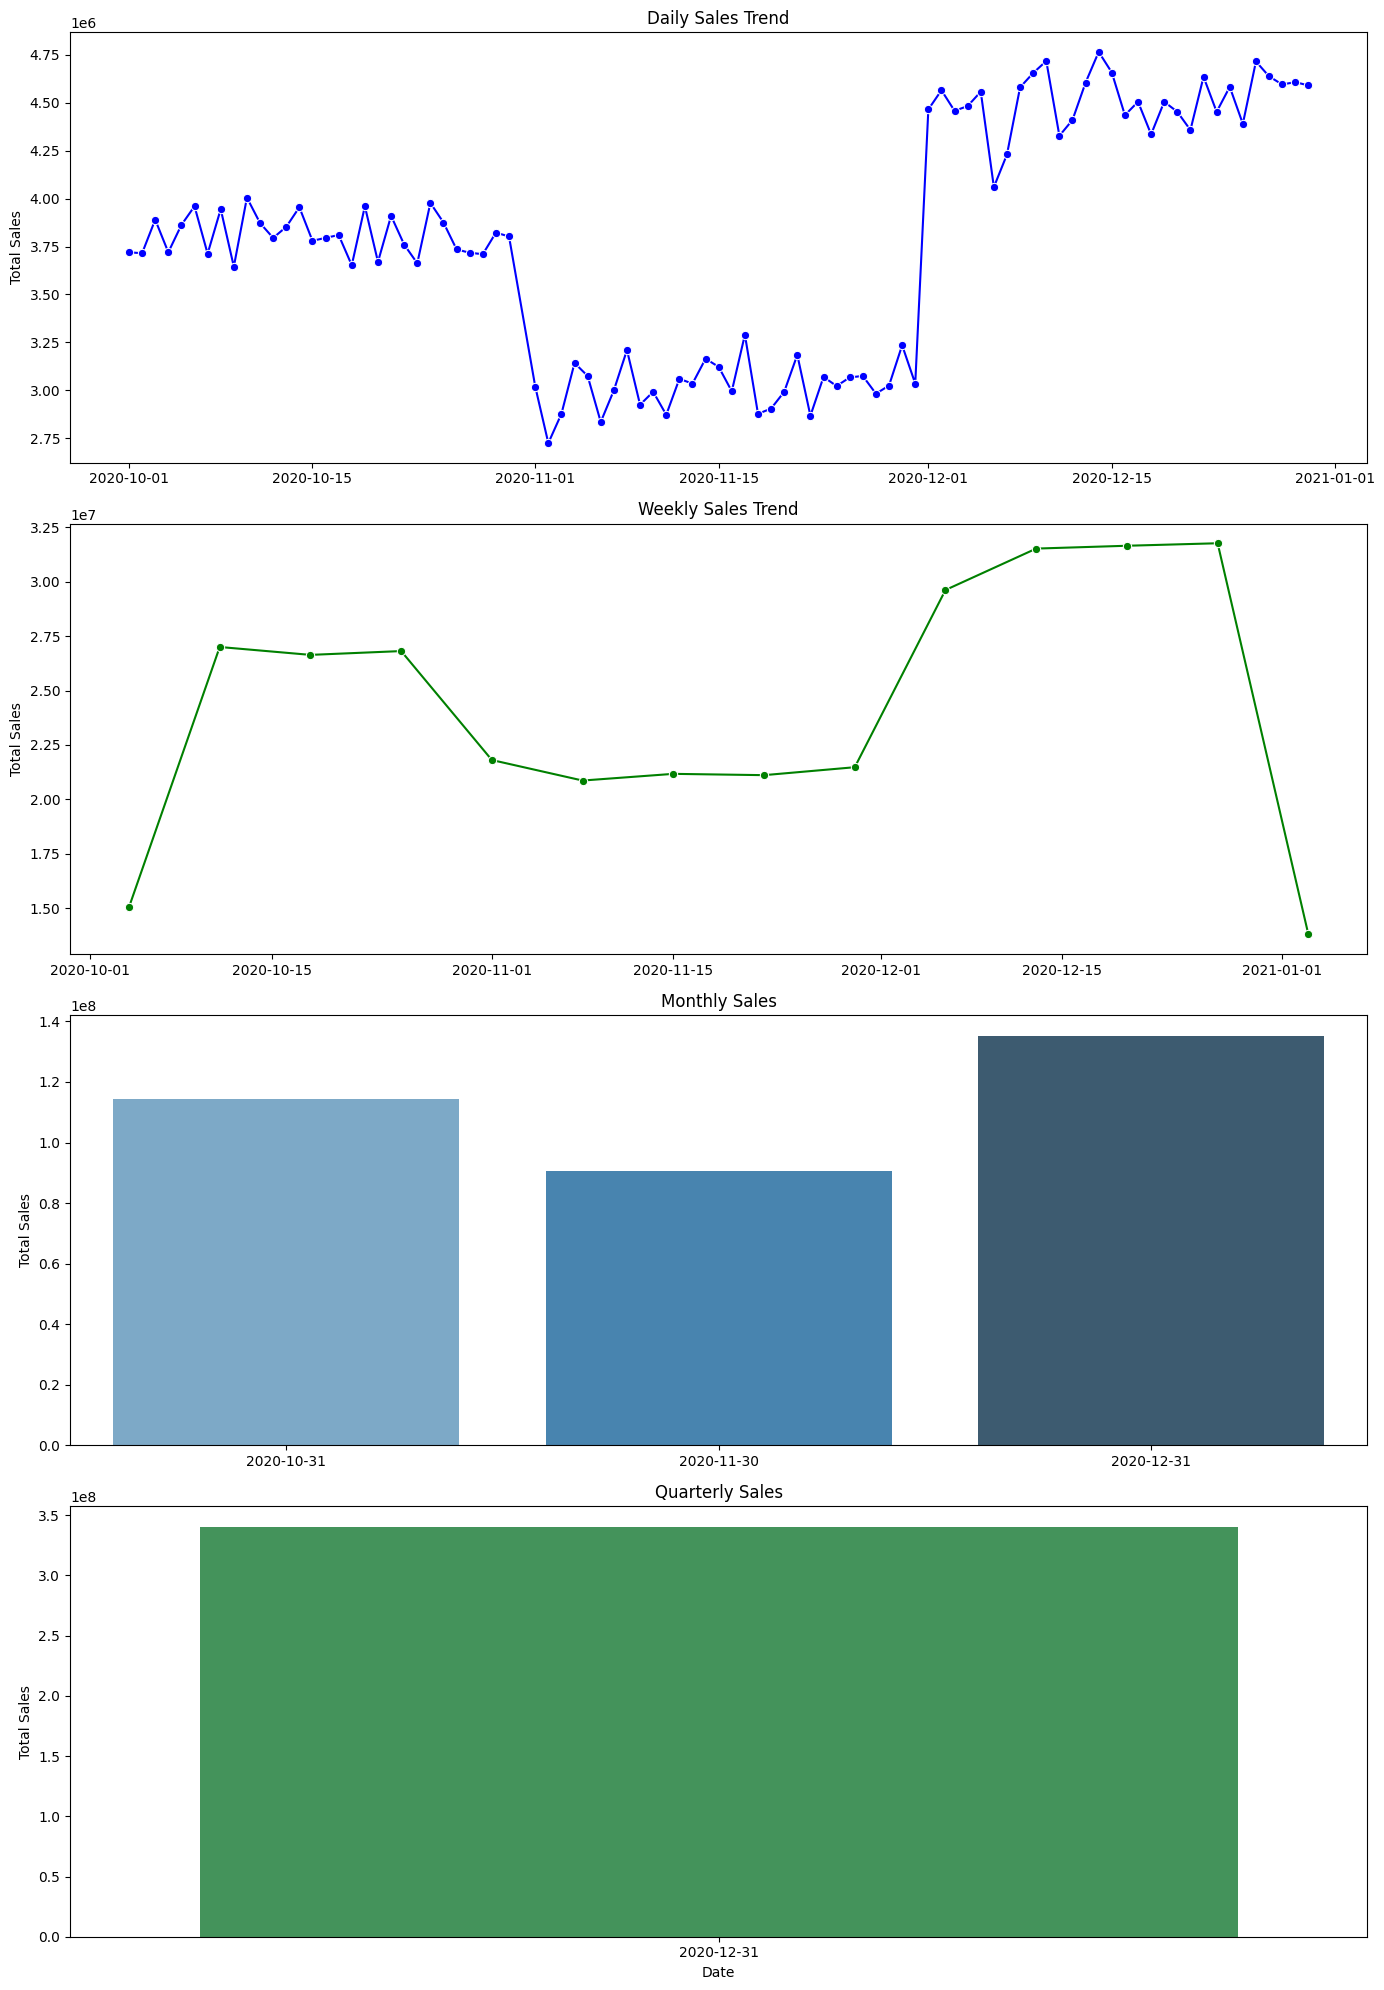

In [158]:
#3.2 
#Ensure the visualization is clear and accessible for effective decision-making by the head of sales and marketing (S&M).
#The dashboard must contain daily, weekly, monthly, and quarterly charts.
#(Any visualization library can be used for this purpose. However, since statistical analysis is being done, Seaborn is preferred.)
#sns.set_theme(style = "whitegrid", palette= "coolwarm")
# df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
daily_sales = df.groupby("Date")["Sales"].sum().reset_index()
weekly_sales = df.resample('W', on="Date")["Sales"].sum().reset_index()
monthly_sales = df.resample('ME', on="Date")["Sales"].sum().reset_index()
quarterly_sales = df.resample('QE', on="Date")["Sales"].sum().reset_index()

fig, axes = plt.subplots(4, 1, figsize=(14, 20))  # 4 charts stacked vertically

# Daily Sales
sns.lineplot(data=daily_sales, x='Date', y='Sales', marker='o', ax=axes[0], color='blue')
axes[0].set_title("Daily Sales Trend")
axes[0].set_xlabel("")
axes[0].set_ylabel("Total Sales")

# Weekly Sales
sns.lineplot(data=weekly_sales, x='Date', y='Sales', marker='o', ax=axes[1], color='green')
axes[1].set_title("Weekly Sales Trend")
axes[1].set_xlabel("")
axes[1].set_ylabel("Total Sales")

# Monthly Sales
sns.barplot(data=monthly_sales, x='Date', y='Sales', ax=axes[2], palette='Blues_d')
axes[2].set_title("Monthly Sales")
axes[2].set_xlabel("")
axes[2].set_ylabel("Total Sales")

# Quarterly Sales
sns.barplot(data=quarterly_sales, x='Date', y='Sales', ax=axes[3], palette='Greens_d')
axes[3].set_title("Quarterly Sales")
axes[3].set_xlabel("Date")
axes[3].set_ylabel("Total Sales")

plt.tight_layout()
plt.show()

fig.savefig("Sales_Dashboard.png", dpi=300)

3.3 
I recommend using Seaborn for the sales dashboard because it integrates seamlessly with Pandas, simplifies creating statistically informative plots, and automatically provides clean aesthetics and color palettes. The dashboard should include line plots for daily and weekly trends to highlight short-term and weekly sales patterns, and bar plots for monthly and quarterly trends to enable easy high-level comparisons. Adding a demographic breakdown (Kids, Women, Men, Seniors) allows the sales and marketing team to make targeted, data-driven decisions for promotions and inventory planning.

4. Report generation 

4.1
 Use JupyterLab Notebook for generating reports, which includes tasks such as data wrangling, analysis, and visualization. Please note that JupyterLab enables you to integrate code seamlessly with graphs and plots.
4.2 
Use Markdown in suitable places while presenting your report. 
4.3
Use suitable graphs, plots, and analysis reports in the report, along with recommendations. Note that various aspects of analysis require different graphs and plots.
    i. Use a box plot for descriptive statistics.
    ii. Use the Seaborn distribution plot for any other statistical plotting.